In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_vs_paper_vs_sciccors.zip

--2021-04-22 13:09:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: '/tmp/rock_vs_paper_vs_sciccors.zip'

     0K .......... .......... .......... .......... ..........  0%  527K 9m59s
    50K .......... .......... .......... .......... ..........  0% 1,13M 7m15s
   100K .......... .......... .......... .......... ..........  0% 1,61M 5m54s
   150K .......... .......... .......... .......... ..........  0% 1,16M 5m32s
   200K .......... .......... .......... .......... ..........  0% 1,34M 5m11s
   250K .......... .......... .......... .......... ..........  0%  714K 5m33s
   300K .......... .......... ....

  5300K .......... .......... .......... .......... ..........  1% 70,7K 12m2s
  5350K .......... .......... .......... .......... ..........  1% 1,09M 11m58s
  5400K .......... .......... .......... .......... ..........  1% 5,01M 11m52s
  5450K .......... .......... .......... .......... ..........  1% 6,15M 11m46s
  5500K .......... .......... .......... .......... ..........  1%  288K 11m49s
  5550K .......... .......... .......... .......... ..........  1% 1,44M 11m44s
  5600K .......... .......... .......... .......... ..........  1%  234K 11m50s
  5650K .......... .......... .......... .......... ..........  1% 1,20M 11m46s
  5700K .......... .......... .......... .......... ..........  1% 1,08M 11m42s
  5750K .......... .......... .......... .......... ..........  1% 1,30M 11m38s
  5800K .......... .......... .......... .......... ..........  1% 1,26M 11m34s
  5850K .......... .......... .......... .......... ..........  1% 1,38M 11m30s
  5900K .......... .......... .......... 

 99600K .......... .......... .......... .......... .......... 31% 59,7K 12m8s
 99650K .......... .......... .......... .......... .......... 31%  960K 12m7s
 99700K .......... .......... .......... .......... .......... 31% 1,04M 12m7s
 99750K .......... .......... .......... .......... .......... 31%  438K 12m6s
 99800K .......... .......... .......... .......... .......... 31%  219K 12m6s
 99850K .......... .......... .......... .......... .......... 31%  475K 12m6s
 99900K .......... .......... .......... .......... .......... 31%  459K 12m6s
 99950K .......... .......... .......... .......... .......... 31% 1,78M 12m5s
100000K .......... .......... .......... .......... .......... 31% 1,73M 12m5s
100050K .......... .......... .......... .......... .......... 31% 1,42M 12m4s
100100K .......... .......... .......... .......... .......... 31% 1,59M 12m4s
100150K .......... .......... .......... .......... .......... 31% 89,9K 12m5s
100200K .......... .......... .......... .......... 

124550K .......... .......... .......... .......... .......... 39% 1008K 11m6s
124600K .......... .......... .......... .......... .......... 39% 1,57M 11m6s
124650K .......... .......... .......... .......... .......... 39% 2,92M 11m5s
124700K .......... .......... .......... .......... .......... 39% 4,25M 11m5s
124750K .......... .......... .......... .......... .......... 39%  555K 11m5s
124800K .......... .......... .......... .......... .......... 39%  858K 11m4s
124850K .......... .......... .......... .......... .......... 39% 6,45M 11m4s
124900K .......... .......... .......... .......... .......... 39% 5,98M 11m3s
124950K .......... .......... .......... .......... .......... 39% 2,38M 11m3s
125000K .......... .......... .......... .......... .......... 39% 2,27M 11m3s
125050K .......... .......... .......... .......... .......... 39% 2,60M 11m2s
125100K .......... .......... .......... .......... .......... 39% 1,35M 11m2s
125150K .......... .......... .......... .......... 

245500K .......... .......... .......... .......... .......... 77% 1,21M 3m18s
245550K .......... .......... .......... .......... .......... 77% 2,04M 3m17s
245600K .......... .......... .......... .......... .......... 77%  267K 3m17s
245650K .......... .......... .......... .......... .......... 77%  899K 3m17s
245700K .......... .......... .......... .......... .......... 77% 1,17M 3m17s
245750K .......... .......... .......... .......... .......... 77%  806K 3m17s
245800K .......... .......... .......... .......... .......... 77%  224K 3m17s
245850K .......... .......... .......... .......... .......... 77%  125K 3m17s
245900K .......... .......... .......... .......... .......... 78%  347K 3m16s
245950K .......... .......... .......... .......... .......... 78%  864K 3m16s
246000K .......... .......... .......... .......... .......... 78%  590K 3m16s
246050K .......... .......... .......... .......... .......... 78%  277K 3m16s
246100K .......... .......... .......... .......... 

263050K .......... .......... .......... .......... .......... 83% 6,22M 2m38s
263100K .......... .......... .......... .......... .......... 83% 5,63M 2m37s
263150K .......... .......... .......... .......... .......... 83% 3,94M 2m37s
263200K .......... .......... .......... .......... .......... 83%  217K 2m37s
263250K .......... .......... .......... .......... .......... 83%  178K 2m37s
263300K .......... .......... .......... .......... .......... 83% 46,0K 2m37s
263350K .......... .......... .......... .......... .......... 83%  314K 2m37s
263400K .......... .......... .......... .......... .......... 83%  358K 2m37s
263450K .......... .......... .......... .......... .......... 83%  356K 2m37s
263500K .......... .......... .......... .......... .......... 83%  410K 2m36s
263550K .......... .......... .......... .......... .......... 83%  241K 2m36s
263600K .......... .......... .......... .......... .......... 83% 1,35M 2m36s
263650K .......... .......... .......... .......... 

In [3]:
import zipfile, os
local_zip = '/tmp/rock_vs_paper_vs_sciccors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [4]:
os.listdir(base_dir)

['paper', 'README_rpc-cv-images.txt', 'rock', 'scissors']

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    rotation_range = 20,
    fill_mode = 'wrap',
    horizontal_flip = True,
    validation_split = 0.2
)

In [6]:
training_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    shuffle = True,
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [8]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [9]:
model.fit(
    training_generator,
    steps_per_epoch = 16,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2
)

Epoch 1/15
16/16 - 16s - loss: 1.5788 - accuracy: 0.3438 - val_loss: 1.0815 - val_accuracy: 0.3438
Epoch 2/15
16/16 - 13s - loss: 1.0441 - accuracy: 0.4871 - val_loss: 0.9058 - val_accuracy: 0.6562
Epoch 3/15
16/16 - 11s - loss: 0.8074 - accuracy: 0.6600 - val_loss: 0.8438 - val_accuracy: 0.6250
Epoch 4/15
16/16 - 11s - loss: 0.5230 - accuracy: 0.8211 - val_loss: 0.3704 - val_accuracy: 0.8672
Epoch 5/15
16/16 - 10s - loss: 0.3554 - accuracy: 0.8652 - val_loss: 0.2969 - val_accuracy: 0.8984
Epoch 6/15
16/16 - 9s - loss: 0.3071 - accuracy: 0.8965 - val_loss: 0.3863 - val_accuracy: 0.9062
Epoch 7/15
16/16 - 8s - loss: 0.2528 - accuracy: 0.9277 - val_loss: 0.2507 - val_accuracy: 0.8906
Epoch 8/15
16/16 - 8s - loss: 0.2261 - accuracy: 0.9199 - val_loss: 0.2491 - val_accuracy: 0.8984
Epoch 9/15
16/16 - 7s - loss: 0.2091 - accuracy: 0.9404 - val_loss: 0.1735 - val_accuracy: 0.9375
Epoch 10/15
16/16 - 7s - loss: 0.2077 - accuracy: 0.9395 - val_loss: 0.2415 - val_accuracy: 0.9062
Epoch 11/15
16

In [10]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

ModuleNotFoundError: No module named 'google.colab'

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
GUNTING


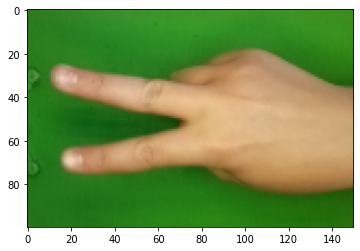

In [19]:
uploaded = files.upload()

for gambar in uploaded.keys():
  path = gambar
  img = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  clasification = model.predict(images, batch_size = 10)

  print(gambar)
  if clasification[0][0] == 1:
    print("KERTAS")
  elif clasification[0][1] == 1:
    print("BATU")
  elif clasification[0][2] == 1:
    print("GUNTING")
  else:
    print("GAMBAR TIDAK DIKETAHUI")